# Exercícios aula 13

In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

## 1)

Aplique o algoritmo de limiarização do Método de Otsu. Utilize-o nas imagens “harewood.jpg”, “nuts.jpg”, “snow.jpg” e “img_aluno”.

In [2]:
def plot(n_imgs_line, *args):
    plt.figure(figsize=(20, 20))
    for i, img in enumerate(args):
        plt.subplot(n_imgs_line, n_imgs_line, i+1)
        plt.imshow(img, cmap='gray')
    plt.show()

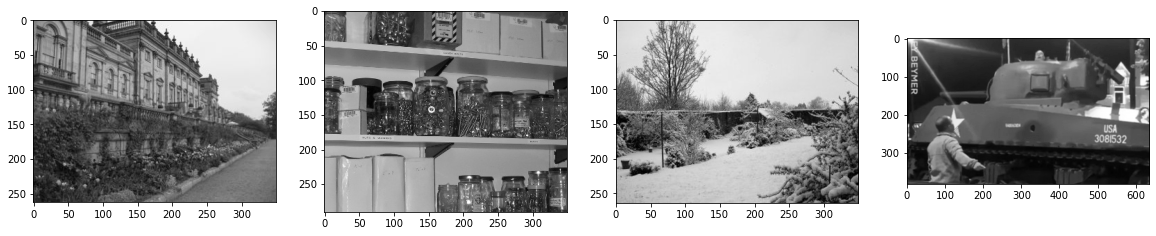

In [3]:
img_harewood = cv2.imread('harewood.jpg', cv2.IMREAD_GRAYSCALE)
img_nuts = cv2.imread('nuts.jpg', cv2.IMREAD_GRAYSCALE)
img_snow = cv2.imread('snow.jpg', cv2.IMREAD_GRAYSCALE)
img_aluno = cv2.cvtColor(cv2.imread('aluno.jpg'), cv2.COLOR_BGR2GRAY)

plot(4, img_harewood, img_nuts, img_snow, img_aluno)

In [4]:
def otsu_limiarization(img):
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    return cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

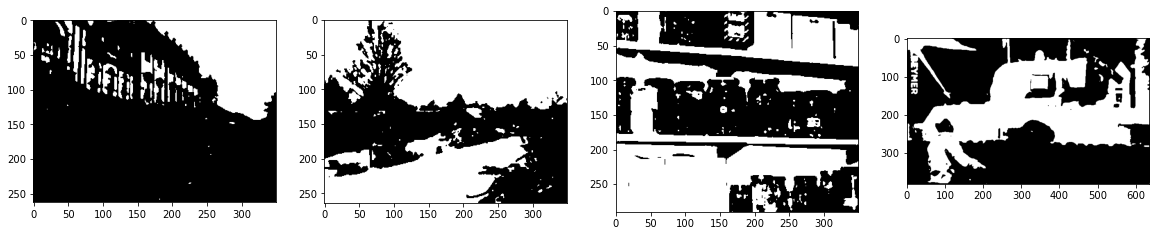

In [5]:
th_harewood = otsu_limiarization(img_harewood)
th_nuts = otsu_limiarization(img_nuts)
th_snow = otsu_limiarization(img_snow)
th_aluno = otsu_limiarization(img_aluno)
plot(4, th_harewood, th_snow, th_nuts, th_aluno)

## 2) 

Considere a pasta de atividade_2 que contém imagens de corpo caloso. Fazer o K-means com objetivo de SEGMENTAR apenas as imagens de corpo caloso.


In [6]:
import numpy as np

def img_kmeans(img):
    np.random.seed(1)
    img_copy = img.copy()

    img_copy = cv2.blur(img_copy, (9, 9))

    pixel_values = np.float32(img_copy.reshape((-1, 1)))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    n_klusters = 13 

    _, labels, (centers) = cv2.kmeans(pixel_values, n_klusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    labels = labels.flatten()

    segmented_image = centers[labels.flatten()].reshape(img_copy.shape)

    masked_image = np.copy(img_copy).reshape((-1, 1))
    cluster = labels[np.argmax(segmented_image)]
    masked_image[labels != cluster] = 255
    masked_image = masked_image.reshape(img_copy.shape)

    dilated_image = cv2.dilate(masked_image, np.ones((3, 3)), iterations=1)

    return dilated_image

In [7]:
def get_objetctive(img):
    LOWER_RED = np.array([0, 50, 50])
    UPPER_RED = np.array([10, 255, 255])

    mask_img = cv2.inRange(img, LOWER_RED, UPPER_RED)
    inv_mask = np.where(mask_img == 0, 255, 0)
    
    return inv_mask


In [8]:
def verify(img, img_objective):
    img_copy = img_kmeans(img).copy()

    img_objective_copy= get_objetctive(img_objective).copy()

    heigth = img_copy.shape[0]
    width = img_copy.shape[1]

    img_objective_resize = cv2.resize(img_objective_copy.astype(np.uint8), (width, heigth), interpolation= cv2.INTER_AREA)

    plot(2, img_copy, img_objective_resize)


    return np.sum(img_copy == img_objective_resize) / (np.prod(img_objective_resize.shape))

In [9]:
from os import listdir
from os.path import isfile, join

imgs = [f for f in listdir('corpo caloso') if isfile(join('corpo caloso', f))]
imgs_apply = [f for f in imgs if '_o.png' in f]
imgs_objective = [f for f in imgs if f not in imgs_apply]

imgs_objective.sort()
imgs_apply.sort()

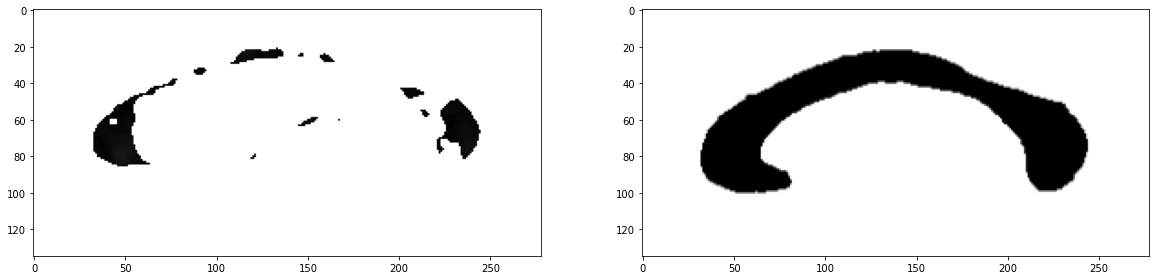

Precisão na imagem 1: 83.0%


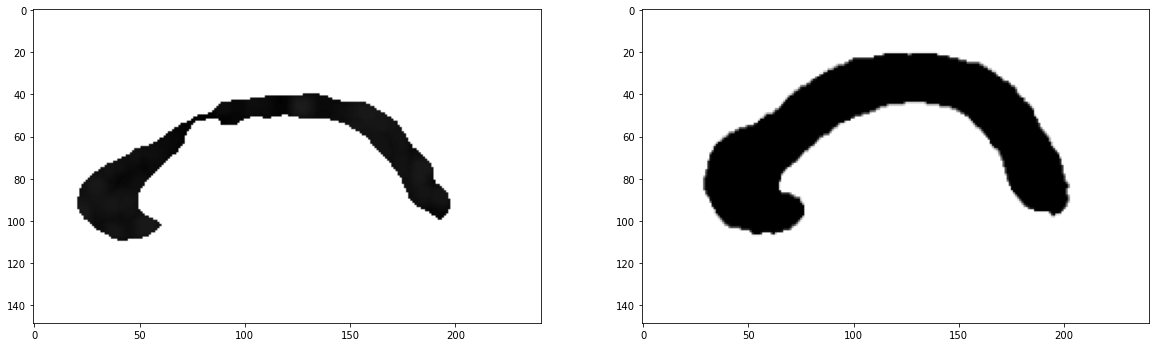

Precisão na imagem 2: 81.0%


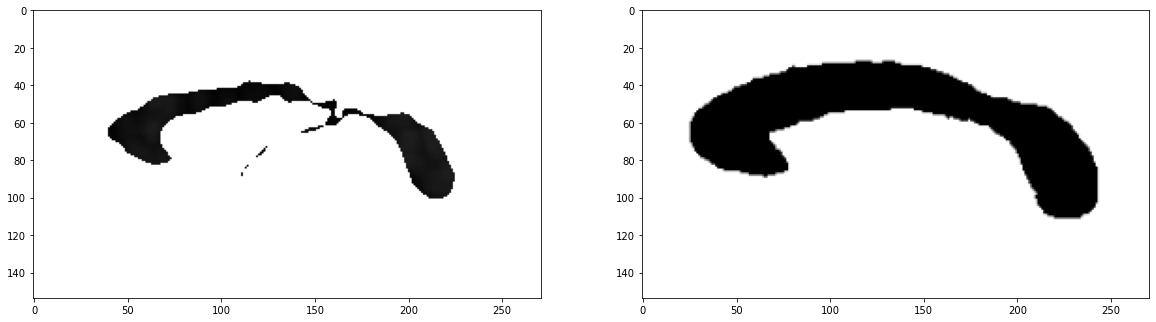

Precisão na imagem 3: 82.0%


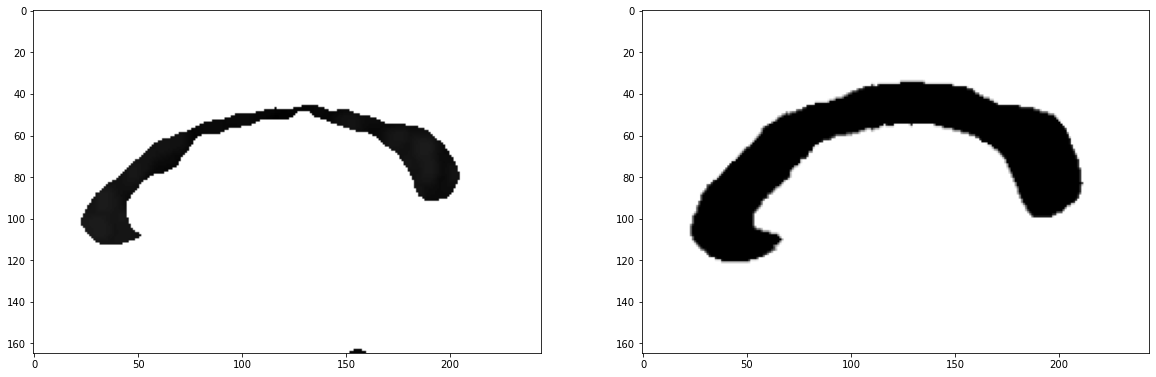

Precisão na imagem 4: 85.0%


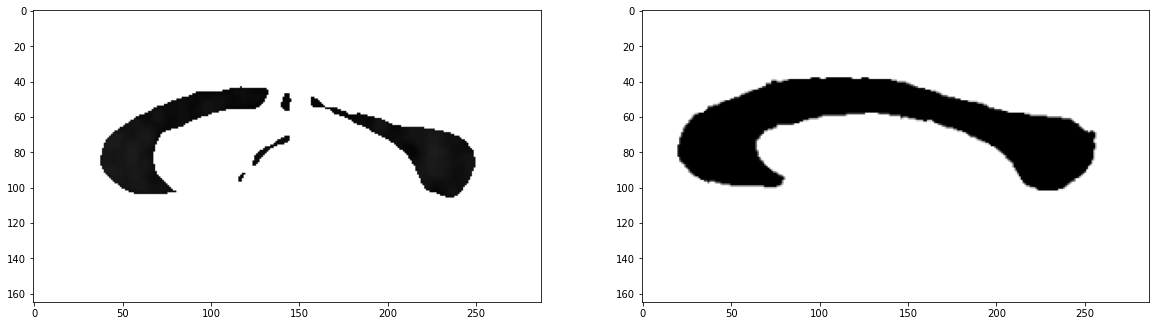

Precisão na imagem 5: 84.0%


In [11]:
for index, imgs in enumerate(zip(imgs_apply, imgs_objective)):
    img_caloso = cv2.imread(join('corpo caloso', imgs[0]), cv2.IMREAD_GRAYSCALE)
    img_caloso_objective = cv2.cvtColor(cv2.imread(join('corpo caloso', imgs[1])), cv2.COLOR_BGR2HSV)
    print(f'Precisão na imagem {index + 1}: {np.round_(verify(img_caloso, img_caloso_objective), 2) * 100}%')